# Plotting_Sigmoid

Sigmoid 2d

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [ ]:
def Sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [ ]:
Sigmoid(1,.5,0)

0.6224593312018546

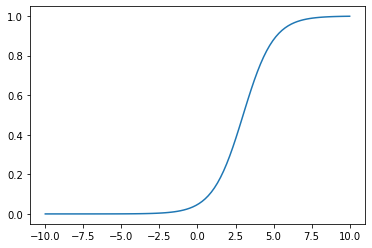

In [ ]:
w=1 #@param {type: "slider", min: -2, max: 2}
b=-3 #@param {type: "slider", min: -5, max: 5}
X=np.linspace(-10,10,100)
Y=Sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

Sigmoid 3D

In [ ]:
def Sigmoid_3d(w1,w2,x1,x2,b):
  return 1.0/(1.0+np.exp(-(w1*x1+w2*x2+b)))

In [ ]:
Sigmoid_3d(1,0,.5,0,0)

0.6224593312018546

In [ ]:
from mpl_toolkits import mplot3d
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
XX1,XX2=np.meshgrid(X1,X2)

Text(0.5, 0, 'Y')

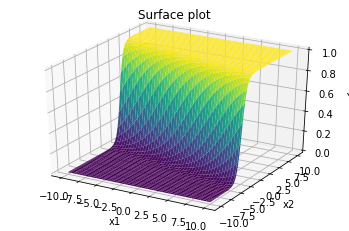

In [ ]:
w1=.5 #@param {type: "slider", min: -2, max: 2}
w2=2#@param {type: "slider", min: -2, max: 2}
b=0#@param {type: "slider", min: -2, max: 2}
Y=Sigmoid_3d(w1,w2,XX1,XX2,b)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Y')

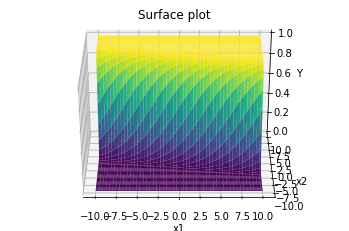

In [ ]:
ax.view_init(30,270)
fig
##WE can see that irrespective of value of x1 we have similar curve for all values of X2

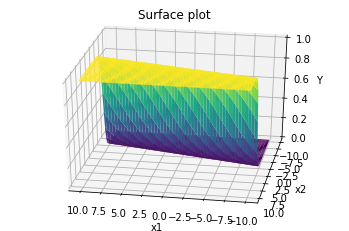

In [ ]:
ax.view_init(30,100)
fig

In [ ]:
w_unknown=0.5
b_unknown=0.25
X=np.random.random(25)*20-10
Y=Sigmoid(X,w_unknown,b_unknown)

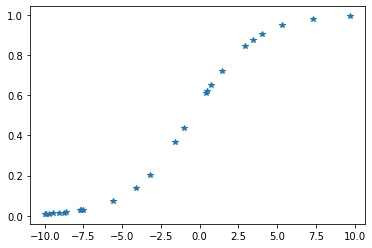

In [ ]:
plt.plot(X,Y,"*")

In [ ]:
def Calculate_loss(X,Y,w_est,b_est):
  loss=0
  for x,y in zip(X,Y):
    loss+=(y-Sigmoid(x,w_est,b_est))**2
  return loss

In [ ]:
w=np.linspace(-1,1,100)
b=np.linspace(-1,1,100)
WW,BB=np.meshgrid(w,b)
LOSS=np.zeros(WW.shape)

In [ ]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    LOSS[i][j]=Calculate_loss(X,Y,WW[i][j],BB[i][j])

Text(0.5, 0, 'LOSS')

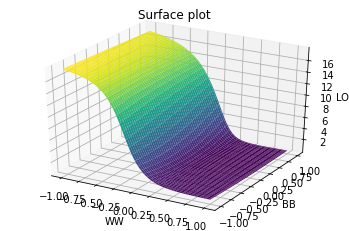

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, LOSS,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.set_xlabel('WW')
ax.set_ylabel('BB')
ax.set_zlabel('LOSS')

In [ ]:
ax.view_init(30,270)
##WE can see that irrespective of value of x1 we have similar curve for all values of X2

In [ ]:
ij=np.argmin(LOSS)

In [ ]:
i=int(np.floor(ij/LOSS.shape[1]))

In [ ]:
j=int(ij-i*LOSS.shape[1])

In [ ]:
WW[i,j]

0.49494949494949503

In [ ]:
BB[i,j]

0.2525252525252526

# Class For Sigmoid

In [ ]:
class sigmoid_neuron:
  def __init__(self):
    self.w=None
    self.b=None
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def grad_w(self,x,y):
    fx=self.sigmoid(self.perceptron(x))
    return fx*(1-fx)*(fx-y)*x
  def grad_b(self,x,y):
    fx=self.sigmoid(self.perceptron(x))
    return fx*(1-fx)*(fx-y)
  def fit(self,X,Y,eps=0.01,lr=.5,initialise=True,display_loss=False):
    if(initialise):
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
    if(display_loss):
      loss=[]
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epochs"):
      dw=0
      db=0  
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      self.w-=lr*dw
      self.b-=lr*db
      if display_loss:
        Y_pred=self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y_pred,Y))
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('loss')
    return (self.w,self.b)
  def predict(self,X):
    Y_pred=[]
    for x in X:
      Y_pred.append(self.sigmoid(self.perceptron(x)))
    return np.array(Y_pred)

In [ ]:
X=np.array([2,3,4,5,8]).reshape(-1,1)
Y=np.array([0.047,0.268,.73,.952,.999]).reshape(-1,1)

NameError: ignored

In [ ]:
sigm=sigmoid_neuron()

In [ ]:
sigm.fit(X,Y,100000)

#### Toy Data

In [ ]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=[1,1,1,0,0,0]

In [ ]:
sn=sigmoid_neuron()

In [ ]:
def plot_sns(X,sn):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  XX1,XX2=np.meshgrid(X1,X2)
  YY=np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val=np.asarray([X1[j],X2[i]]);
      YY[i,j]=sn.sigmoid(sn.perceptron(val))
  plt.contourf(XX1,XX2,YY)
  plt.scatter(X[:,0],X[:,1],c=Y)
  plt.show()

In [ ]:
sn.fit(X,Y)
for i in range(20):
  plot_sns(X,sn)
  sn.fit(X,Y,5,1,False)

In [ ]:
sn.w

In [ ]:
sn.b

#### HOMEWORK Animation

In [ ]:
#### HOMEWORK

 # PRACTICAL APPLICATIONS

In [ ]:
import pandas as pd
data=pd.read_csv("/content/mobile_cleaned.csv")

In [ ]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [ ]:
data.shape

(341, 88)

In [ ]:
X=data.drop('Rating',axis=1)

In [ ]:
Y=data['Rating']

In [ ]:
Y

0      4.5
1      4.5
2      4.4
3      4.3
4      4.4
      ... 
336    3.8
337    3.9
338    4.1
339    3.6
340    4.3
Name: Rating, Length: 341, dtype: float64

In [ ]:
threshold=4.2
data['Class']=(data['Rating']>=threshold).astype(np.int)

In [ ]:
data['Class'].value_counts()

0    182
1    159
Name: Class, dtype: int64

In [ ]:
Y_binarised=data['Class'].values

### Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X=StandardScaler()
X_scaled_train=scaler_X.fit_transform(X_train)
X_scaled_test=scaler_X.transform(X_test)

In [ ]:
R=np.random.random([100,1])

In [ ]:
R

array([[0.84077756],
       [0.66118106],
       [0.84001126],
       [0.42770045],
       [0.03159021],
       [0.54474157],
       [0.16154455],
       [0.80203342],
       [0.37438977],
       [0.89684746],
       [0.20468912],
       [0.82816625],
       [0.2000463 ],
       [0.30752959],
       [0.73618716],
       [0.35176818],
       [0.62032906],
       [0.49200444],
       [0.89433221],
       [0.70965111],
       [0.99789226],
       [0.35346484],
       [0.82935095],
       [0.42567169],
       [0.5476201 ],
       [0.92425141],
       [0.92244341],
       [0.20345559],
       [0.77293206],
       [0.4939029 ],
       [0.61443046],
       [0.27382315],
       [0.12008945],
       [0.20235385],
       [0.75775902],
       [0.89577505],
       [0.87712088],
       [0.62348937],
       [0.76634436],
       [0.56074054],
       [0.41982469],
       [0.27617257],
       [0.09837262],
       [0.77762073],
       [0.63337626],
       [0.39200013],
       [0.67512699],
       [0.048

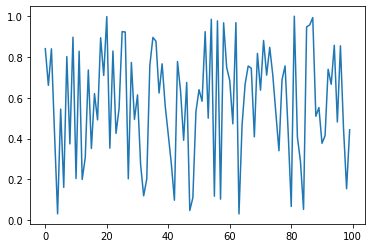

In [ ]:
plt.plot(R)

In [ ]:
np.mean(R)

0.5736165190420945

In [ ]:
np.std(R)

0.2762258458901288

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
RR=scaler.transform(R)

In [ ]:
np.mean(RR)

-6.317169010117141e-16

In [ ]:
np.std(RR)

0.9999999999999998

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0,stratify=Y_binarised)

In [ ]:
X_test.shape

(86, 87)

In [ ]:
scaler_X=StandardScaler()
X_scaled_train=scaler_X.fit_transform(X_train)
X_scaled_test=scaler_X.transform(X_test)

In [ ]:
X_scaled_train=scaler_X.fit_transform(X_train)

In [ ]:
X_scaled_test=scaler_X.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler=MinMaxScaler()

In [ ]:
y_train=np.array(y_train)

In [ ]:
y_scaled_train=min_max_scaler.fit_transform(y_train.reshape(-1,1))

In [ ]:
y_scaled_test=min_max_scaler.transform(np.array(y_test).reshape(-1,1))

In [ ]:
scaled_threshold=min_max_scaler.transform(np.asarray(threshold).reshape(-1,1))

In [ ]:
scaled_threshold[0][0]

0.6800000000000002

In [ ]:
Y_binarised_train=(y_scaled_train>scaled_threshold).astype("int").ravel()

In [ ]:
Y_binarised_test=(y_scaled_test>scaled_threshold).astype("int").ravel()

# Fitting

In [ ]:
sn=sigmoid_neuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(array([[-4.63303686e-02,  6.70797698e-02, -1.67380956e-01,
          5.14300672e-02, -9.31618805e-02,  1.81893053e-02,
          1.49883108e-01, -2.76033715e-03, -3.85533685e-02,
          1.09085188e-01, -1.82675790e-02, -4.34398155e-01,
         -1.96812412e-01, -4.91810099e-01,  3.09499702e-01,
          1.42248585e+00, -4.02008829e-02, -9.56714259e-01,
         -2.05459655e-02,  6.30236695e-04,  8.43726005e-01,
         -5.20864490e-02,  5.21979523e-01,  1.17361067e+00,
          4.88871241e-02, -5.01804377e-01, -3.18450304e-01,
         -4.61599775e-01, -4.56875110e-02, -3.80875702e-01,
         -4.94479805e-01, -6.10086784e-01,  4.04537639e-01,
         -5.82433345e-01, -7.75838611e-01, -3.82788936e-01,
         -1.56178023e+00, -3.69182452e-01, -2.13622829e+00,
         -3.39478417e-01, -2.28773929e-01, -7.95446033e-01,
         -1.72879259e+00, -2.24307307e+00, -1.76880607e-01,
         -7.50947989e-01,  8.42429304e-01, -2.62609808e-01,
         -2.78242395e-01,  2.87014244e-0

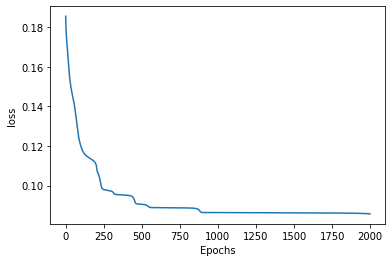

In [ ]:
sn.fit(X_scaled_train,y_scaled_train,epochs=2000,lr=.01,display_loss=True)

In [ ]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)
Y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype("int").ravel()

In [ ]:
Y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype("int").ravel()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_train=accuracy_score(Y_pred_binarised_train,Y_binarised_train)

In [ ]:
accuracy_train

0.7333333333333333

In [ ]:
accuracy_test=accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [ ]:
accuracy_test

0.6511627906976745

# Sigmoid with CrossEntropy

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
class sigmoid_neuron_crossentropy:
  def __init__(self):
    self.w=None
    self.b=None
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def grad_w(self,x,y):
    fx=self.sigmoid(self.perceptron(x))
    return (fx-y)*x
  def grad_b(self,x,y):
    fx=self.sigmoid(self.perceptron(x))
    return (fx-y)
  def fit(self,X,Y,epochs=1,lr=.5,initialise=True,display_loss=False):
    if(initialise):
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
    if(display_loss):
      loss=[]
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epochs"):
      dw=0
      db=0  
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      self.w-=lr*dw
      self.b-=lr*db
      if display_loss:
        Y_pred=self.sigmoid(self.perceptron(X))
    if (display_loss):
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('loss')
    return (self.w,self.b)
  def predict(self,X):
    Y_pred=[]
    for x in X:
      Y_pred.append(self.sigmoid(self.perceptron(x)))
    return np.array(Y_pred)

In [ ]:
sn=sigmoid_neuron_crossentropy()

In [ ]:
sn.fit(X_scaled_train,y_scaled_train,epochs=5000,lr=.01)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(array([[-0.22615961,  0.35569595,  0.98549722,  0.30246982, -0.47889045,
          0.41704255, -0.21412813, -0.25855661,  0.36133355,  0.30670006,
          0.36795232, -0.57188718, -0.2476541 , -0.24237532, -0.7571817 ,
          0.33854578, -0.15278899,  0.07390253, -0.30404983, -0.26989731,
          0.5714923 , -0.73659902, -0.03999196, -0.31022942,  0.53264712,
         -0.49143826,  0.6824791 , -0.51911188, -0.40501307, -0.40215407,
          0.40707876, -0.67636369, -0.17649544, -0.62916688, -0.6470157 ,
         -0.34609656, -0.34335644, -0.37145975, -0.30681054, -0.26561594,
          0.09836977, -0.62782597, -0.54221634, -0.44631183, -0.15601208,
         -0.72150523,  0.21054087, -0.41409781, -0.33378467, -0.74785655,
         -0.4055933 , -0.62755726, -0.06407472, -0.93647017,  0.30440976,
         -0.47028288, -0.1386455 , -0.40148969, -0.61833511, -0.41137165,
         -0.14002164,  0.32329592, -0.97946783, -0.46018168, -1.26363919,
         -0.43223332, -0.05346934, -0.

In [ ]:
accuracy_train=accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test=accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [ ]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)
Y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype("int").ravel()

In [ ]:
accuracy_train

0.6862745098039216

In [ ]:
accuracy_test

0.7441860465116279